<a href="https://colab.research.google.com/github/KavyaMagudeswaran/kavya-m/blob/main/train_and_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Mart sales analysis

In [ ]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.


#loading of data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Train (1).csv')

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Test (1).csv')

#Data structure and content

In [ ]:
train.dtypes
#show the data type of columns

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
test.dtypes
# show the data type of columns

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
train.isnull().sum()
# it show the missing values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
test.isnull().sum()
#it show the missing values

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
train.info()
# information about data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()
# information about data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.duplicated()
#it show how many dulipate row

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
test.duplicated()
#it show how many dulipate row

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [ ]:
train.describe()
# generate describe statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()
# generate describe statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
train.head()
# getting a quick look at data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()
# getting a quick look at data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.columns
# viewing the names of all columns in data

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
test.columns
# viewing the names of all columns in data

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
train['Item_Type'].value_counts()
#value counts in "Item_Type".

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
test['Item_Type'].value_counts()
#value counts in "Item_Type".

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [ ]:
train['Item_Fat_Content'].value_counts()
#value counts in "Item_Fat_Content".

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
test['Item_Fat_Content'].value_counts()
#value counts in "Item_Fat_Content".

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


**Data Preprocessing**

In [ ]:
train['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
# values of inconsistent get replace in "Item_Fat_Content".


In [ ]:
train['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
# values of inconsistent get replace in "Item_Fat_Content".

In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


#Explartory Analysis

**Uni variate analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

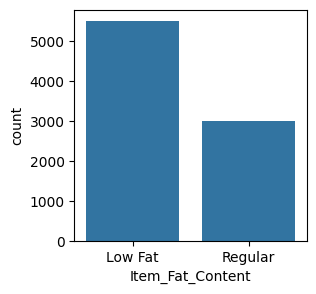

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()

#this determine the size of the plot
#function to create a bar plot that shows the frequency of each unique value in tha data
#label X-axis
#display the plot

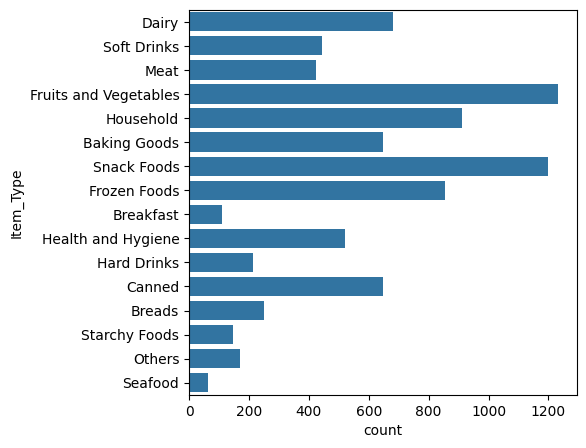

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()
# label y-axis

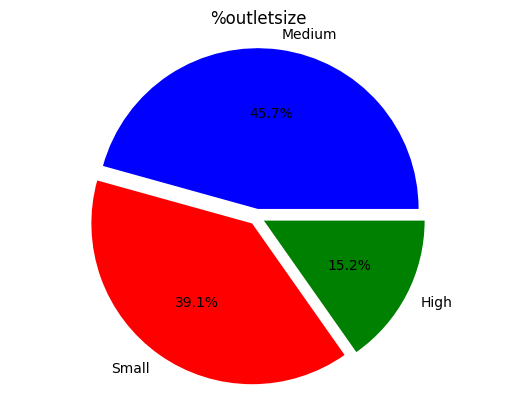

In [ ]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.05,0.05)
colors=('blue','red','green')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()
#Title  a chart as Outlet_Size
#explode is parameter for difference
#colour variation
#pie chart

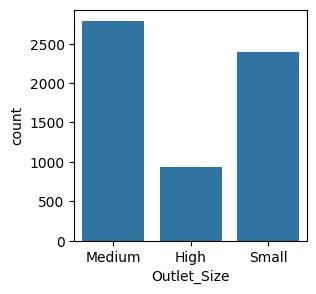

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Size' , data=train)
plt.xlabel('Outlet_Size')
plt.show()

The medium outlet size is high small outletsize is lower than the medium, whether high outlet size is lower than the both medium and small.

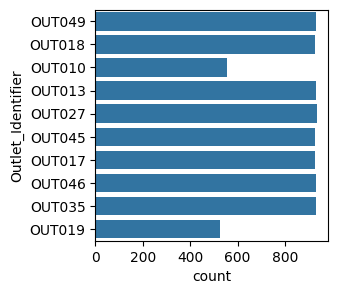

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Identifier' , data=train)
plt.ylabel('Outlet_Identifier')
plt.show()

In this we have plotted the graph using the test data. So here the snacks have saled higher when comparedto the other products.

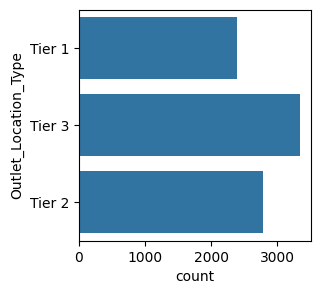

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Location_Type' , data=train)
plt.ylabel('Outlet_Location_Type')
plt.show()

Here the location type is named as tier. The tier 3 is higher in count. Whereas tier 1 is low. And the tier 2 is higher than the tier 1.

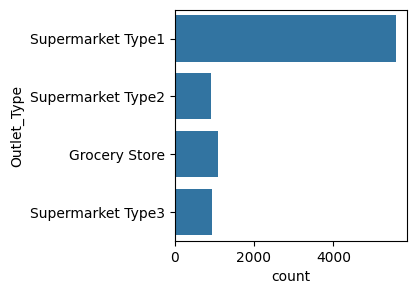

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Type' , data=train)
plt.ylabel('Outlet_Type')
plt.show()

supermarket type 1 is high where as supermarket type 2 is low in count when compared to others.

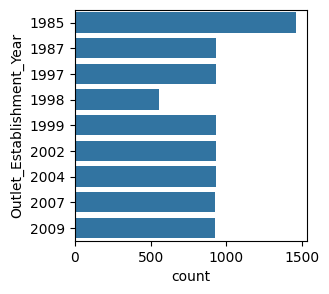

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year' , data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()

The outlet establishment year from(1985-2009) is given in this graph. so the count is higher in the year 1985 whereas lower in the year 1998. And the year 1987,1997 and (1999-2009) are equivalent.

#To handle the missing and null values


In [ ]:
#To handle the missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in train.columns:
    if train[col].dtype=='object':
        train[col]=le.fit_transform(train[col])
#initialized as le
#it contain categorical data as 'object'
#transformation as 'fit_transform'.

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In above datas,the data are changed to numerical values for imputing the missing columns.

In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_columns=['Item_Weight','Outlet_Size']
train[missing_columns]=imputer.fit_transform(train[missing_columns])
#initialized as 'imputer' which can replace missing values with mean of the columns.
#column selection as'Item_Weight' and 'Outlet_Sales'.
#imputing by fit_transform.

In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


After imputing the missing columns, filled with data in a datasets.

To handle the missing and null values for test


In [ ]:
#To handle the missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in test.columns:
    if test[col].dtype=='object':
        test[col]=le.fit_transform(test[col])
#initialized as le
#it contain categorical data as 'object'
#transformation as 'fit_transform'.

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In above datas,the data are changed to numerical values for imputing the missing columns.

In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
test[missing_coloums]=imputer.fit_transform(test[missing_coloums])
#initialized as 'imputer' which can replace missing values with mean of the columns.
#column selection as'Item_Weight' and 'Outlet_Sales'.
#imputing by fit_transform.

In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


After imputing the missing columns, filled with data in a datasets.

# handling the outliers

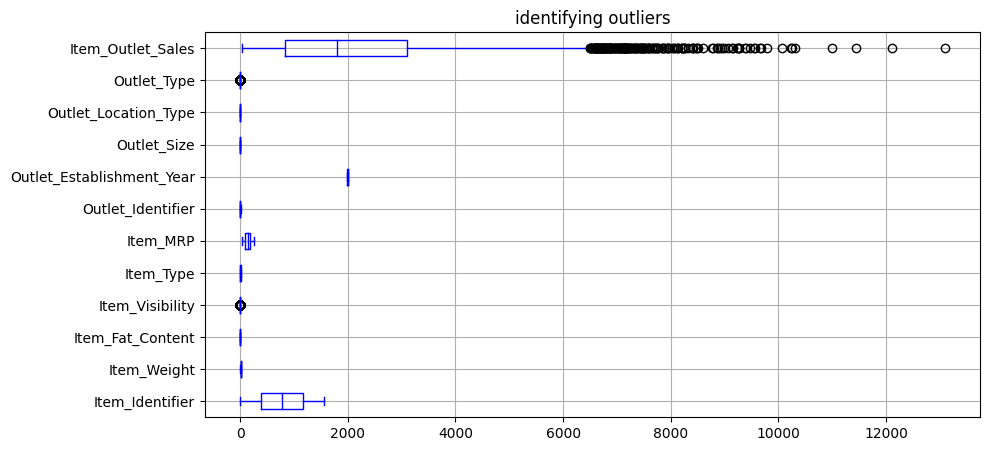

In [ ]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identifying outliers')
plt.show()

In above graph, outliers are exists in two datas

**handling outliers for test**

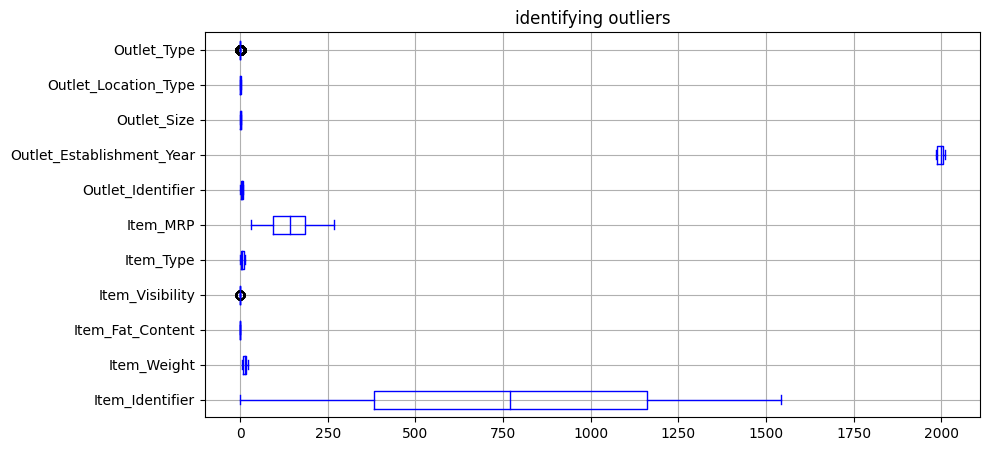

In [ ]:
number_columns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identifying outliers')
plt.show()

In above graph, for test there is two outlayers only exists in range.

In [ ]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [ ]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)

upperlimit 6501.8699
lowerlimit -2566.3261


**Square Tramsformation**

In [ ]:
train['Outlet_Sales_Square']=np.sqrt(train['Item_Outlet_Sales'])

<ipython-input-53-8544ba4d404b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Square'],kde=True,rug=True)


<Axes: xlabel='Outlet_Sales_Square', ylabel='Density'>

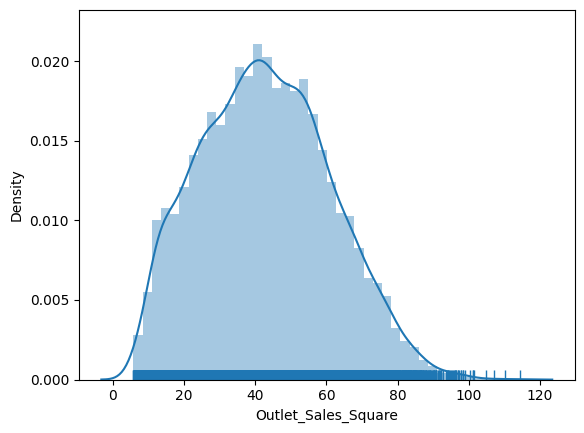

In [ ]:
sns.distplot(a=train['Outlet_Sales_Square'],kde=True,rug=True)

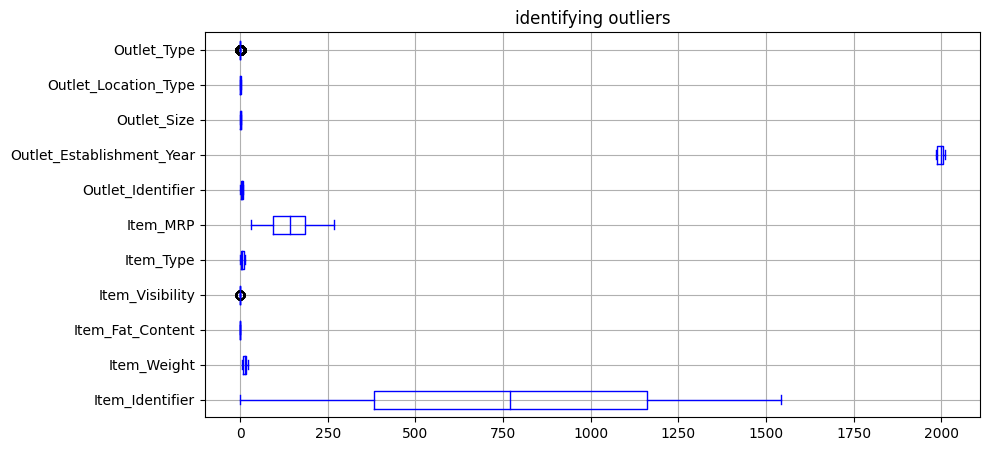

In [ ]:
number_columns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identifying outliers')
plt.show()

In above graph, the square transformation are applied in outliers. so there is four outliers in range and out of range is one (Item_Outlet_Sales).

**Cube Transformation**

In [ ]:
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])

<function matplotlib.pyplot.show(close=None, block=None)>

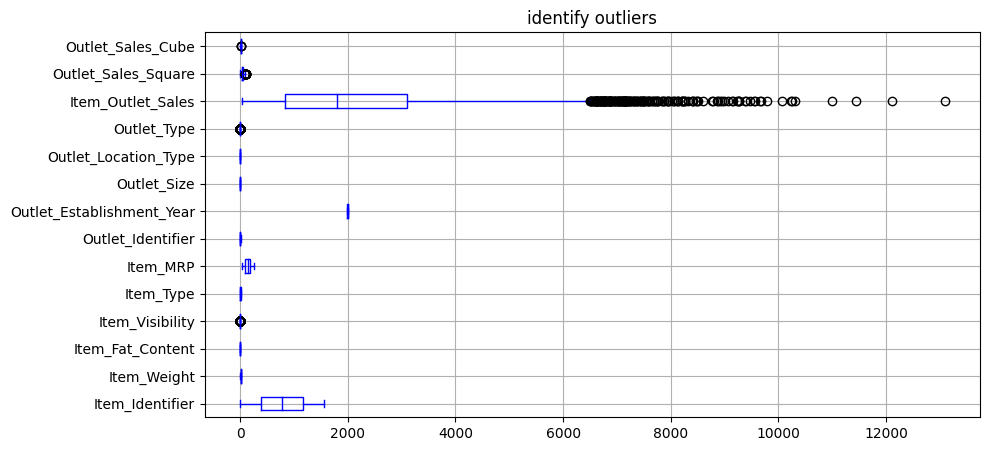

In [ ]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show

In above graph, the cube transformation are applied in outliers. so there is four outliers in range and out of range is one (Item_Outlet_Sales).

**Bivariate Analysis**

<ipython-input-57-b370abf2d6ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

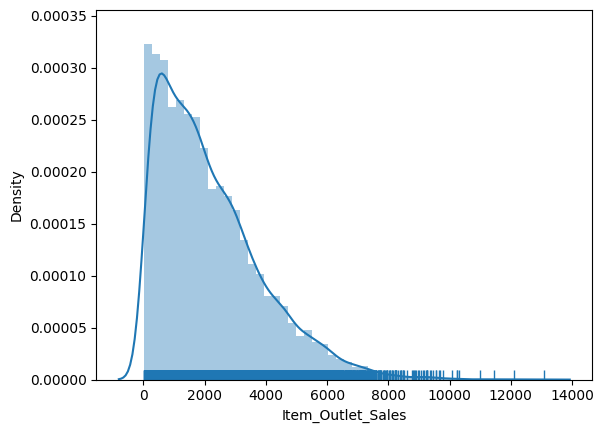

In [ ]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True,rug=True)

The histogram, overlaid with a kernel density estimate (KDE) plot, visualizes the distribution of "Item_Outlet_Sales." The x-axis represents sales values ranging from 0 to 14,000, while the y-axis indicates density. The distribution is right-skewed, showing that most sales are concentrated between 0 and 4,000, with a gradual decrease in frequency as sales values increase.

<ipython-input-58-fa659074ec58>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

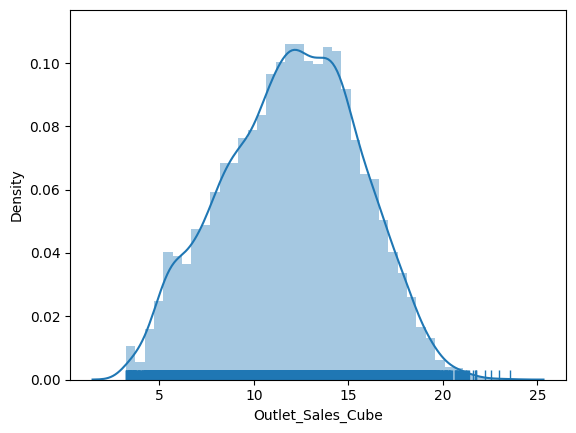

In [ ]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True,rug=True)

The histogram, overlaid with a kernel density estimate (KDE) plot, displays the distribution of "Outlet_sales_cube." The x-axis spans values from approximately 2 to 25, with a bell-shaped distribution indicating a more symmetrical and normal-like pattern compared to the previous image. The density reaches its peak in the 10 to 15 range.

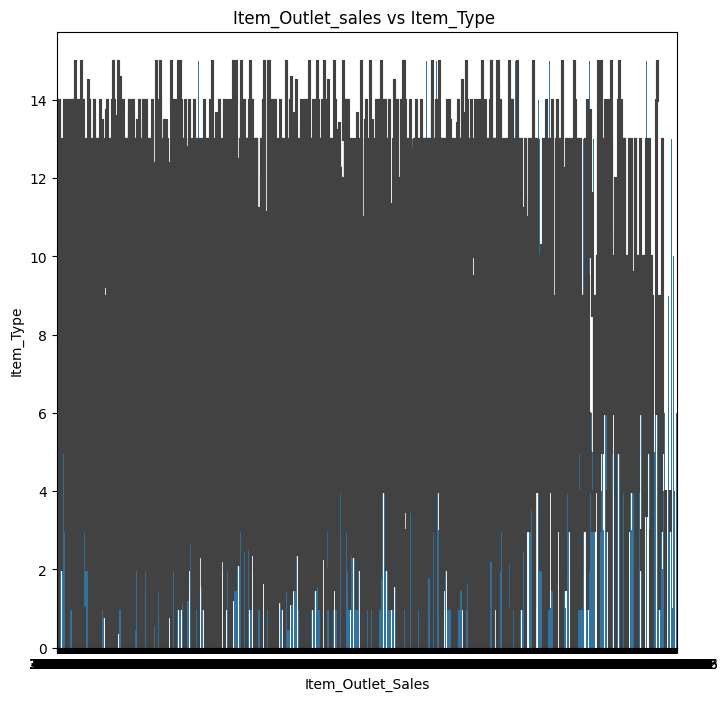

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train).set(title='Item_Outlet_sales vs Item_Type ')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')
plt.show()

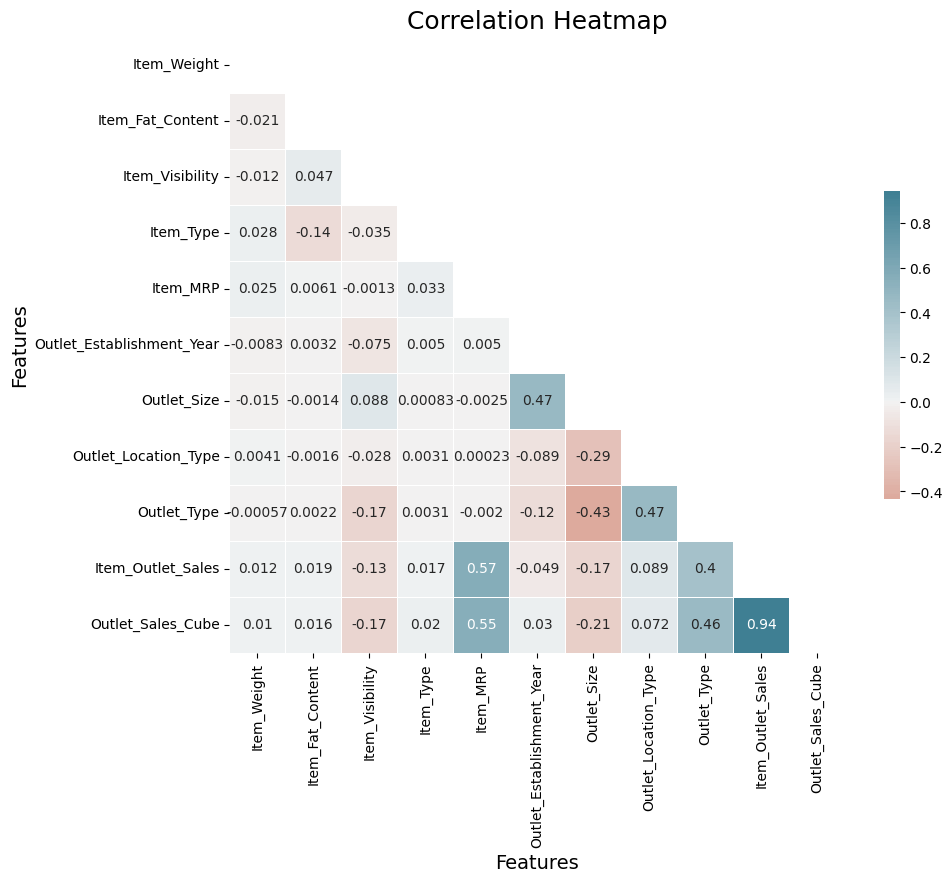

In [ ]:
# Subset the dataset to include only the relevant columns
subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
             'Item_Outlet_Sales','Outlet_Sales_Cube']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

**Correlation Heatmap for test**

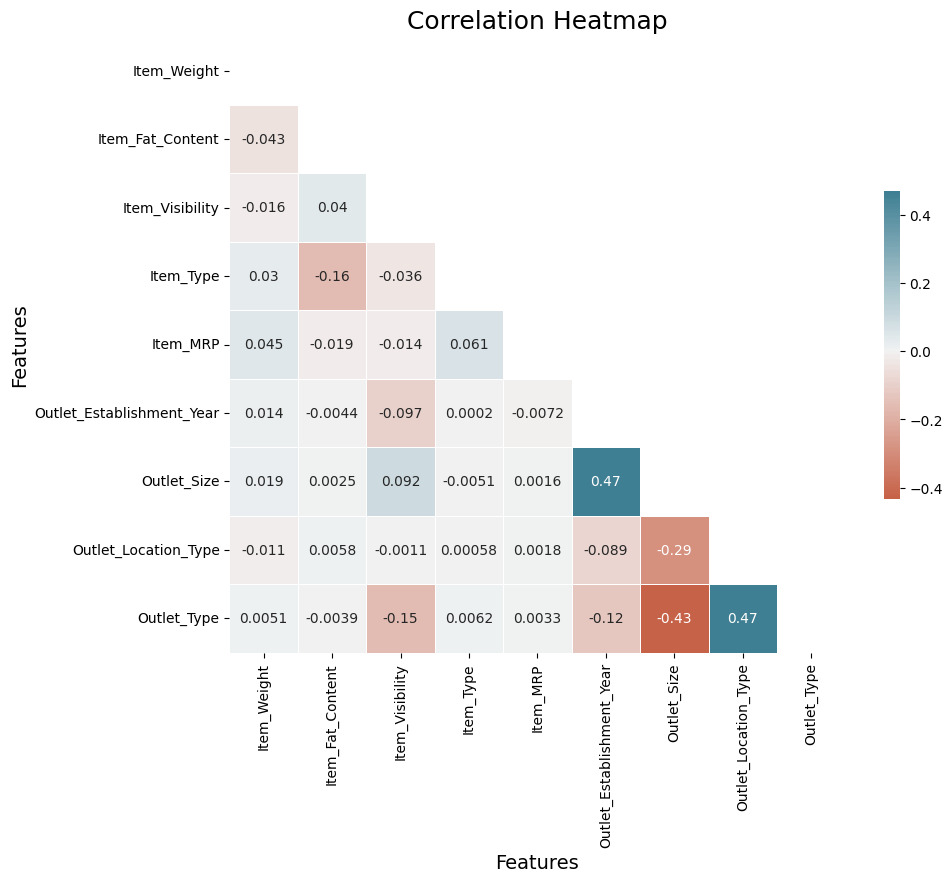

In [ ]:
# Subset the dataset to include only the relevant columns
subset = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

# Feature Engineering

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,61.115775,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,21.057607,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,45.795961,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,27.062520,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,31.538947,9.982319


In [ ]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024-year)

In above, there create a new columns as 'Outlet_Age'. It can calculate using 'Outlet_Establishment_Year'.

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,61.115775,15.515611,25
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,21.057607,7.625576,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,45.795961,12.800240,25
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,27.062520,9.013888,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,31.538947,9.982319,37


In [ ]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Size','Item_Weight','Item_Visibility','Outlet_Sales_Square'],axis=1)

In above , used to delete a data from the quick look at data (.head)

In [ ]:
train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Sales_Cube,Outlet_Age
0,0,4,249.8092,0,1,15.515611,25
1,1,14,48.2692,2,2,7.625576,15
2,0,10,141.6180,0,1,12.800240,25
3,1,6,182.0950,2,0,9.013888,26
4,0,9,53.8614,2,1,9.982319,37


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_Cube']

In [ ]:
scaler=StandardScaler()

In [ ]:
x=scaler.fit_transform(x)

In [ ]:
x=pd.DataFrame(x)

In [ ]:
print(x)

             0         1         2         3         4
0    -0.738147 -0.766479  1.747454 -0.252658 -0.139541
1     1.354743  1.608963 -1.489023  1.002972 -1.334103
2    -0.738147  0.658786  0.010040 -0.252658 -0.139541
3     1.354743 -0.291391  0.660050 -1.508289 -0.020085
4    -0.738147  0.421242 -1.399220 -0.252658  1.293934
...        ...       ...       ...       ...       ...
8518 -0.738147  1.371418  1.180783 -0.252658  1.293934
8519  1.354743 -1.716656 -0.527301 -0.252658 -0.497909
8520 -0.738147  0.183698 -0.897208 -0.252658 -0.736822
8521  1.354743  1.371418 -0.607977  1.002972 -1.334103
8522 -0.738147  1.608963 -1.052261 -0.252658  0.099372

[8523 rows x 5 columns]


In [ ]:
x.head()

,0,1,2,3,4
0,-0.738147,-0.766479,1.747454,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,-0.252658,1.293934


In [ ]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [ ]:
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year: 2024-year)

In above, there create a new columns as 'Outlet_Age'. It can calculate using 'Outlet_Establishment_Year'.




In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1,25
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1,17
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0,26
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1,17
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3,39


In [ ]:
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight','Item_Visibility'],axis=1)

In above , used to delete a data from the quick look at data (.head)

In [ ]:
test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0,13,107.8622,0,1,25
1,1,4,87.3198,1,1,17
2,0,11,241.7538,2,0,26
3,0,13,155.0340,1,1,17
4,1,4,234.2300,2,3,39


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=test[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Type','Outlet_Age']]

In [ ]:
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(x)

In [ ]:
print(X)

[[-0.73814723 -0.76647929  1.74745381 -0.25265831 -0.13954076]
 [ 1.35474328  1.6089627  -1.48902325  1.00297245 -1.33410274]
 [-0.73814723  0.6587859   0.01004021 -0.25265831 -0.13954076]
 ...
 [-0.73814723  0.1836975  -0.89720755 -0.25265831 -0.73682175]
 [ 1.35474328  1.3714185  -0.60797692  1.00297245 -1.33410274]
 [-0.73814723  1.6089627  -1.05226104 -0.25265831  0.09937163]]


In [ ]:
X=pd.DataFrame(X)

In [ ]:
X.head()

,0,1,2,3,4
0,-0.738147,-0.766479,1.747454,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,-0.252658,1.293934


**Modelbuilding**

In [ ]:
from sklearn.linear_model import LinearRegression
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [ ]:
#Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X, y)

# Precting the model using the test set
y_predict = lr.predict(X)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, X, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5226744993077834
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.53046004 0.53095626 0.50104314 0.51865233 0.52653705] 

Average CV R-squared score: 0.5215297625400952 



In [ ]:
import pickle

In [ ]:
Bigmart= "BigMart_Analysis.sav"
pickle.dump(lr, open(Bigmart,'wb'))

#Summary

 Big_Mart Analysis

 The Big Mart project harnesses the power of machine learning to refine and enhance sales forecasting. Here’s a step-by-step breakdown of our analytical journey:

**Data Loading**
Import the dataset into our analysis environment. Ensures all relevant data—sales figures, product details, and more—is organized and accessible for a smooth analysis.

**Step 1: Understanding Data Structures and Content**
Examine the dataset’s layout and components.Gain clarity on how product details, sales numbers, and categorical variables are arranged to better understand the information.

** Step 2: Data Preprocessing**
 Clean the dataset by correcting errors, addressing missing values, and removing unnecessary information. Prepare the data for accurate analysis, ensuring it’s both reliable and relevant.

**Step 3: Univariate Analysis**
 Analyze individual variables to explore their distribution and statistical properties. Understand each variable’s behavior, including trends, central tendencies, and variations.

 **Step 4: Handling Missing and Categorical Values**
 Impute missing values and encode categorical data. Ensure data completeness and convert categorical information into a format suitable for modeling.

**Step 5: Managing Outliers**
 Detect and address outliers in the data. Minimize their impact on analysis to enhance model accuracy and reliability.

**Step 6: Cube Transformation**
 Apply data transformations to stabilize variance and normalize distributions. Improve the consistency and quality of the data, making it more suitable for advanced analysis.

**Step 7: Bivariate Analysis**
 Explore relationships between pairs of variables. Identify significant correlations and dependencies to understand how different factors influence sales.

** Step 8: Feature Engineering**
 Create and refine features to enhance model performance. Develop features that improve the model’s ability to make accurate sales predictions.

 **Step 9: Model Building**
 Construct and optimize machine learning models for sales forecasting. Train and fine-tune models to ensure they provide precise and actionable sales forecasts.